In [9]:
from matplotlib import pyplot as plt

In [261]:
import cv2
import numpy as np

def predict(chunk):
    net = cv2.dnn.readNet('./yolov3_custom_last_v2.weights','./yolov3_custom.cfg')
#     net = cv2.dnn.readNetFromDarknet('./yolov3_custom.cfg','./yolov3_custom_last_v2.weights')
    classes = []
    with open("./custom.name", "r") as f:
        classes = f.read().splitlines()

    # cap = cv2.VideoCapture('test1.mp4')
    cap = chunk
    font = cv2.FONT_HERSHEY_PLAIN
    colors = np.random.uniform(0, 255, size=(100, 3))
#     print(colors)
#     while True:
    # for i in range(10):
    #     _, img = cap.read()
    img = cv2.imread(cap)
    height, width, _ = img.shape

    blob = cv2.dnn.blobFromImage(img, 1/255, (414, 414), (0,0,0), swapRB=True, crop=False)
    net.setInput(blob)
    output_layers_names = net.getUnconnectedOutLayersNames()
    layerOutputs = net.forward(output_layers_names)
    
    
    
    boxes = []
    confidences = []
    class_ids = []
    
    
    for output in layerOutputs:
        for detection in output:
            print(detection,'detection')
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                center_x = int(detection[0]*width)
                center_y = int(detection[1]*height)
                w = int(detection[2]*width)
                h = int(detection[3]*height)

                x = int(center_x - w/2)
                y = int(center_y - h/2)

                boxes.append([x, y, w, h])
                confidences.append((float(confidence)))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.2, 0.4)
    

    return_label = ''
    if len(indexes)>0:
        for i in indexes.flatten():
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            if label == 'M':
                color = (0, 0, 0)
            elif label == 'NM':
                color = (0, 0, 255)
            else:
                color = (255, 0 ,0)
            
            
            confidence = str(round(confidences[i],2))
#             color = colors[i]
            cv2.rectangle(img, (x,y), (x+w, y+h), color, 5)
            cv2.putText(img, label, (x, y+20), font, 25, color, 10)
#             cv2.putText(img, label, (x, y+20), font, 25, color, 5)
            return_label += label
            
    img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img2)

    print('indexes', indexes)
    print('boxes',boxes)     
    print('confidences',confidences)
    print('classes',classes)
    print('return_label',return_label)
    print('class_ids',class_ids)
    
    return img
    
    

#     
#     print(label)
#     
    
#     cv2.imshow(img)
#     key = cv2.waitKey(1)
#     if key==27:
#         break



[6.9968186e-02 6.5446116e-02 2.8912547e-01 1.7309672e-01 2.6444766e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[5.7085849e-02 6.8304047e-02 4.2811942e-01 6.7049664e-01 1.7991952e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[5.3560074e-02 4.8990905e-02 9.9946886e-01 9.5557117e-01 1.7283693e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[1.3008513e-01 7.2690047e-02 1.5952122e-01 1.3576098e-01 9.6622625e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[1.1171531e-01 7.1830735e-02 6.2930149e-01 1.0685285e+00 2.6076722e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[1.1649031e-01 6.0223002e-02 1.4217030e+00 1.2877181e+00 2.5984571e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[1.8673497e-01 7.2087400e-02 2.3232870e-01 1.2140028e-01 2.9580599e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[1.8323793e-01 7.1010031e-02 7.7050066e-01 7.4101198e-01 1.3022139e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection


 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[3.7407227e-02 6.6285241e-01 1.9443473e-01 5.8859074e-01 3.6396071e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[4.0556293e-02 6.4210981e-01 9.7641116e-01 1.2168410e+00 5.3956666e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[1.2392962e-01 6.3470489e-01 1.8092722e-01 1.4669767e-01 5.4950232e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[1.24320865e-01 6.60529673e-01 2.27043405e-01 3.33338529e-01
 2.08100516e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00] detection
[1.2489582e-01 6.4503890e-01 1.3961080e+00 8.9163107e-01 1.2059279e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[1.8830357e-01 6.3856786e-01 2.1745044e-01 1.9088984e-01 2.2477620e-06
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[1.8770078e-01 6.5353078e-01 2.4402943e-01 4.3230668e-01 7.3641206e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[2.0191552e-01 6.5109825e-01 8.6848503e-01 1.0757422e+00 1.5866

 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[8.2607681e-01 1.2728694e-01 1.9300163e-01 2.2935650e-01 2.0017694e-06
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[8.6414874e-01 1.3006128e-01 6.9997154e-02 1.2720007e-01 7.4600571e-08
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[8.6685979e-01 1.2759665e-01 1.2721440e-01 1.1079440e-01 6.5166881e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[8.6372620e-01 1.3059768e-01 1.8532546e-01 2.8786442e-01 4.1322646e-06
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[9.0172535e-01 1.3277465e-01 6.2713519e-02 1.4608938e-01 1.7935898e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[9.04582441e-01 1.34068146e-01 1.26427516e-01 1.19105406e-01
 1.96251136e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00] detection
[9.0312982e-01 1.3496219e-01 1.5747367e-01 3.8436735e-01 8.2992665e-06
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[9.4120914e-01 1.3819490e-01 4.5413546e-02 1.9668891e-01 1.1096

 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[1.6959365e-01 4.0280679e-01 7.3942661e-02 8.3518133e-02 1.1420964e-06
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[1.72779590e-01 4.06152606e-01 9.66010913e-02 1.12131536e-01
 2.79210349e-06 0.00000000e+00 0.00000000e+00 0.00000000e+00] detection
[1.6784827e-01 4.0221658e-01 1.5154976e-01 2.9348490e-01 1.3625593e-06
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[2.0982124e-01 4.0035671e-01 4.9308214e-02 7.2648495e-02 7.8706472e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[2.1520725e-01 4.0314043e-01 8.4591560e-02 1.0729610e-01 4.9180801e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[2.0711130e-01 4.0404290e-01 1.9076066e-01 3.3217970e-01 7.9557805e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[2.5087580e-01 4.0118456e-01 6.6888466e-02 1.1621305e-01 1.3070793e-06
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[2.5141823e-01 4.0146750e-01 9.7406492e-02 1.1610803e-01 9.8043

[5.8197963e-01 7.0755202e-01 1.2768398e-01 1.6414800e-01 2.0373998e-06
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[5.84178805e-01 7.11522222e-01 1.76221952e-01 4.00238961e-01
 1.16183394e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00] detection
[6.3566279e-01 7.1311474e-01 7.8699619e-02 1.1509267e-01 7.3023824e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[6.37202799e-01 7.12813079e-01 8.11468586e-02 1.09956354e-01
 2.52676341e-06 0.00000000e+00 0.00000000e+00 0.00000000e+00] detection
[6.3765866e-01 7.0644605e-01 1.3775235e-01 3.0227005e-01 2.6765113e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[6.8135577e-01 7.1562517e-01 7.1489125e-02 1.4521043e-01 2.0488278e-05
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[6.7611146e-01 7.1585017e-01 6.7513458e-02 8.8039622e-02 3.1932670e-06
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[6.7905176e-01 7.0423973e-01 1.3806015e-01 3.3195415e-01 4.1701566e-07
 0.0000000e+00 0.0000000e+00 0.0000000

 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[7.4494797e-01 9.4278437e-01 1.3784488e-01 7.6575339e-02 3.6203869e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[7.4124408e-01 9.3237334e-01 1.6846967e-01 3.8342461e-01 6.7102621e-09
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[7.8942746e-01 9.4216168e-01 4.1541807e-02 1.0523309e-01 2.8964777e-08
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[7.8278774e-01 9.4432729e-01 1.1672716e-01 8.8853128e-02 5.4451984e-08
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[7.8204143e-01 9.3139017e-01 1.5329579e-01 3.8659498e-01 3.4626895e-09
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[8.27505410e-01 9.45513010e-01 3.95717472e-02 1.16737336e-01
 4.85272089e-09 0.00000000e+00 0.00000000e+00 0.00000000e+00] detection
[8.2760406e-01 9.4823009e-01 1.4981832e-01 9.1386646e-02 3.3058878e-08
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[8.2695538e-01 9.3288291e-01 1.4840373e-01 4.2592013e-01 1.3908

 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[7.2689275e-03 8.8044003e-02 1.2321921e-02 1.8110168e-01 1.2391605e-06
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[1.0781269e-02 8.0174670e-02 4.8786882e-02 1.0973347e-01 9.9410769e-10
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[2.5064228e-02 8.5985608e-02 2.4692446e-02 3.8762596e-02 5.7249544e-08
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[2.3330234e-02 8.3848387e-02 7.5741231e-02 1.4698672e-01 3.6977124e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[2.7467068e-02 8.0285035e-02 8.6836226e-02 1.4179650e-01 4.6608399e-08
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[4.6733998e-02 8.8031821e-02 1.5379720e-02 3.7814602e-02 5.2029460e-08
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[4.9416326e-02 9.0029284e-02 5.1434152e-02 6.3965321e-02 8.3848647e-08
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[4.3256395e-02 8.7551594e-02 9.9059947e-02 1.2180002e-01 2.8255283e-07


 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[6.2603581e-01 1.4739314e-01 1.0090723e-01 5.7400249e-02 1.7300893e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[6.4331686e-01 1.4911029e-01 1.4771869e-02 2.2109412e-02 1.6151139e-06
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[6.4661503e-01 1.4661202e-01 8.3558224e-02 4.6560634e-02 8.6181541e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[6.4514983e-01 1.4766958e-01 1.0568764e-01 5.8856085e-02 2.5319974e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[6.6277182e-01 1.4942087e-01 1.5982680e-02 2.2386367e-02 9.6134295e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[6.662197e-01 1.468799e-01 8.886199e-02 4.273467e-02 6.455107e-07
 0.000000e+00 0.000000e+00 0.000000e+00] detection
[6.64544463e-01 1.47615165e-01 1.06125936e-01 5.79501390e-02
 2.08220442e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00] detection
[6.8204814e-01 1.5001777e-01 1.5873425e-02 2.2462767e-02 5.8408762e-07


 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[2.5840908e-02 2.1430945e-01 8.4754854e-02 1.4218836e-01 1.3547530e-08
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[4.7766767e-02 2.2231914e-01 1.3324738e-02 3.1838112e-02 1.8513470e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[4.9542967e-02 2.2552994e-01 4.8934918e-02 5.7020675e-02 1.9143131e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[4.3631233e-02 2.2367892e-01 8.8778272e-02 1.1067586e-01 2.9683520e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[6.7875244e-02 2.2363019e-01 2.1086903e-02 2.7434455e-02 1.9176512e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[7.03281388e-02 2.22932711e-01 8.72521773e-02 3.21775153e-02
 1.12610536e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00] detection
[6.5329306e-02 2.2340345e-01 1.3378476e-01 6.6060826e-02 9.9079976e-08
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[8.6730406e-02 2.2591481e-01 2.1603052e-02 2.0390753e-02 5.6745

 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[7.5946683e-01 2.6308504e-01 9.3507819e-02 5.8698598e-02 2.7945146e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[7.7790266e-01 2.6420569e-01 1.8057553e-02 2.4902478e-02 1.0626501e-06
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[7.8151768e-01 2.6170450e-01 7.7751011e-02 4.6580609e-02 1.3476086e-06
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[7.7919459e-01 2.6288733e-01 9.1151491e-02 5.7844553e-02 4.6073660e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[7.9779285e-01 2.6489088e-01 1.8445011e-02 2.4097202e-02 9.8940188e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[8.0099392e-01 2.6218534e-01 8.1630319e-02 4.0449038e-02 9.3719547e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[7.9888999e-01 2.6345757e-01 9.4378732e-02 5.4922286e-02 4.7687718e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[8.1733871e-01 2.6550195e-01 1.8872224e-02 2.3939922e-02 8.1879250e-07


[2.4112111e-01 3.3771154e-01 2.8591134e-02 2.0882780e-02 1.0836860e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[2.4060941e-01 3.3737767e-01 5.5193894e-02 5.8760121e-02 6.7990705e-08
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[2.4054980e-01 3.3822256e-01 9.3544528e-02 4.2456817e-02 6.5255080e-08
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[2.6059911e-01 3.3684364e-01 1.9072361e-02 2.9721776e-02 5.0640050e-08
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[2.60441482e-01 3.37460071e-01 3.84619348e-02 6.63821250e-02
 1.19998145e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00] detection
[2.5975972e-01 3.3853582e-01 7.2517261e-02 6.0099054e-02 2.4219769e-08
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[2.8155336e-01 3.3856708e-01 1.2578606e-02 4.1520599e-02 1.3541283e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[2.8090975e-01 3.3994073e-01 2.2681082e-02 8.2139768e-02 2.5754533e-08
 0.0000000e+00 0.0000000e+00 0.0000000e+00] de

 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[1.08267866e-01 3.92973900e-01 2.64886897e-02 5.25891818e-02
 5.55172726e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00] detection
[1.07942306e-01 3.94002229e-01 1.10956416e-01 6.19754456e-02
 1.10617741e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00] detection
[1.2952469e-01 3.9601150e-01 1.7574707e-02 3.3694837e-02 3.6827169e-06
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[1.2911068e-01 3.9401239e-01 3.4458261e-02 6.6270418e-02 2.7715037e-06
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[1.2903905e-01 3.9613363e-01 8.5606121e-02 4.9761884e-02 1.8845170e-06
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[1.4043213e-01 3.9634320e-01 1.6562581e-02 3.7824232e-02 1.2396450e-05
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[1.4165872e-01 3.9598674e-01 2.8685639e-02 8.2686827e-02 1.9639880e-05
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[1.4331633e-01 3.9796430e-01 6.8185218e-02 5.7934277e-0

 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[1.8219052e-01 4.7290462e-01 1.1068487e-02 3.2002673e-02 7.9646405e-08
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[1.85320303e-01 4.75686818e-01 2.90495120e-02 7.39787966e-02
 1.11201395e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00] detection
[1.8256201e-01 4.7300166e-01 8.0183931e-02 6.9694318e-02 6.0147109e-08
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[2.0317459e-01 4.7049364e-01 1.5987024e-02 2.5839206e-02 4.7667663e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[2.0439601e-01 4.7445890e-01 2.4868935e-02 9.7514108e-02 3.5456793e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[2.0213845e-01 4.7261721e-01 4.5536015e-02 6.5533042e-02 2.0140310e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[2.2142516e-01 4.7308943e-01 1.9367170e-02 3.0994212e-02 3.3944252e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[2.2137697e-01 4.7405407e-01 3.1654671e-02 6.5398887e-02 1.7745

 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[5.4375436e-03 5.4971385e-01 4.1204332e-03 1.0536039e-01 8.2940551e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[6.2102280e-03 5.4938561e-01 1.1090253e-02 1.8438292e-01 4.2934421e-06
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[8.09757598e-03 5.42014897e-01 4.27796170e-02 1.05097935e-01
 1.75361115e-09 0.00000000e+00 0.00000000e+00 0.00000000e+00] detection
[2.4677111e-02 5.4641110e-01 2.4952739e-02 4.2187084e-02 3.0978038e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[2.3521593e-02 5.4531515e-01 6.0798824e-02 1.1501722e-01 1.4337968e-06
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[2.5071006e-02 5.4146671e-01 8.5815154e-02 1.1213278e-01 6.2200002e-08
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[4.6814419e-02 5.5027765e-01 2.7500512e-02 3.1331513e-02 2.7728470e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[4.6683494e-02 5.5298579e-01 4.3801539e-02 4.3583963e-02 2.0779

 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[2.2190067e-01 6.2662882e-01 2.4736825e-02 2.0810643e-02 2.2973939e-08
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[2.2420797e-01 6.2376589e-01 4.9956828e-02 5.7496481e-02 1.8208510e-08
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[2.2425970e-01 6.2519360e-01 6.1977781e-02 6.1404303e-02 2.0153175e-08
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[2.4208783e-01 6.2742764e-01 2.6504038e-02 2.0732209e-02 7.6202497e-08
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[2.4240993e-01 6.2516952e-01 5.2460399e-02 4.9978949e-02 1.0684245e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[2.4281618e-01 6.2936401e-01 8.0056898e-02 7.5309403e-02 1.1651861e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[2.6141340e-01 6.2672722e-01 2.8295577e-02 2.3003131e-02 4.9888820e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[2.5971836e-01 6.2695539e-01 4.2679451e-02 4.3452282e-02 5.5549162e-08


 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[6.8320125e-01 6.8480957e-01 6.9631591e-02 4.5637678e-02 2.0533389e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[7.0019805e-01 6.8164313e-01 1.4921469e-02 5.6877520e-02 1.1753784e-06
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[6.9917786e-01 6.8296009e-01 2.3523973e-02 1.0441000e-01 1.4749772e-06
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[6.9900441e-01 6.8375021e-01 7.5375475e-02 7.2458044e-02 3.2887007e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[7.2038490e-01 6.8504900e-01 1.8223308e-02 4.5144502e-02 8.6657266e-08
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[7.2093320e-01 6.8189168e-01 2.4773480e-02 1.3335828e-01 2.1734333e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[7.216304e-01 6.827582e-01 6.850832e-02 7.950433e-02 7.979604e-08
 0.000000e+00 0.000000e+00 0.000000e+00] detection
[7.4249107e-01 6.8177402e-01 2.7722448e-02 4.5611676e-02 2.3912486e-07
 0.00000

 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[4.8992699e-01 7.5988185e-01 1.4459212e-01 6.6816092e-02 6.8467259e-08
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[5.1184219e-01 7.5912309e-01 2.0342100e-02 1.8957723e-02 3.7122179e-09
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[5.1233906e-01 7.5611210e-01 4.3160066e-02 6.4812317e-02 1.8561046e-09
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[5.1258159e-01 7.5946432e-01 1.3500613e-01 7.7014193e-02 7.1835751e-09
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[5.3020394e-01 7.5888056e-01 2.0046785e-02 3.3471387e-02 6.3363519e-09
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[5.2850384e-01 7.5435901e-01 3.2843828e-02 9.1963679e-02 4.5824651e-09
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[5.2968156e-01 7.5796902e-01 1.3900922e-01 6.3764676e-02 3.3211318e-08
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[5.47044039e-01 7.58817911e-01 2.48914026e-02 3.90250348e-02
 1.0119669

 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[8.9329237e-01 8.1971210e-01 2.6020654e-02 2.6619812e-02 1.9408076e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[8.9578974e-01 8.1997108e-01 7.0984967e-02 5.3009883e-02 4.6167565e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[8.9371055e-01 8.1962734e-01 8.6382784e-02 6.9224216e-02 2.0485976e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[9.1171300e-01 8.1997520e-01 2.8442249e-02 2.2503074e-02 1.9704366e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[9.1481614e-01 8.1913251e-01 7.6841854e-02 5.1342178e-02 5.6944612e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[9.1343540e-01 8.2039917e-01 9.3351744e-02 5.1088776e-02 1.9853891e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[9.3064725e-01 8.1826770e-01 2.9747983e-02 1.7445814e-02 2.3670756e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[9.3307906e-01 8.1829846e-01 6.0389895e-02 4.8058487e-02 2.1146472e-07


 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[3.5759273e-01 8.9706141e-01 3.3958774e-02 6.4985849e-02 1.1556523e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[3.5797518e-01 8.9468408e-01 6.0050406e-02 4.8933979e-02 7.6026680e-08
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[3.7515646e-01 8.9484036e-01 1.6304651e-02 3.6777068e-02 5.0196832e-08
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[3.7261078e-01 8.9583248e-01 3.1159041e-02 9.4458885e-02 2.5735234e-08
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[3.7677625e-01 8.9374566e-01 6.1936770e-02 6.6434994e-02 1.4535376e-08
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[3.9666855e-01 8.9618075e-01 1.7335391e-02 2.9961789e-02 2.5156780e-08
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[3.9595857e-01 8.9571214e-01 3.4639649e-02 7.9076082e-02 9.7616795e-09
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[3.983111e-01 8.951317e-01 6.895695e-02 4.776059e-02 8.385661e-09
 0.00

 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[8.9181173e-01 9.5872808e-01 7.8613721e-02 5.3403992e-02 5.5218356e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[9.1701216e-01 9.5398343e-01 3.0323917e-02 1.7853960e-02 1.4588508e-08
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[9.1412818e-01 9.5249736e-01 8.7120987e-02 3.1068726e-02 3.0158784e-08
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[9.115447e-01 9.584528e-01 8.808334e-02 4.454498e-02 7.723335e-08
 0.000000e+00 0.000000e+00 0.000000e+00] detection
[9.3552577e-01 9.5432919e-01 6.2405001e-02 1.8172951e-02 3.4903351e-08
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[9.3190914e-01 9.5279163e-01 1.2726539e-01 3.2358255e-02 3.7216132e-08
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[9.3251824e-01 9.5916784e-01 8.4852219e-02 4.8208468e-02 1.9578137e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00] detection
[9.550399e-01 9.558184e-01 6.362027e-02 1.678016e-02 7.878639e-08
 0.000000e+00

indexes [[4]
 [0]
 [5]
 [3]]
boxes [[2851, 1673, 361, 316], [1954, 1927, 414, 365], [1966, 1922, 383, 382], [1985, 1939, 390, 346], [1326, 1495, 227, 216], [359, 1588, 242, 271]]
confidences [0.8121170401573181, 0.5402200818061829, 0.529617965221405, 0.6822251677513123, 0.9649776220321655, 0.7131359577178955]
classes ['M', 'NM', 'IMC']
return_label NMIMCMM
class_ids [2, 0, 0, 0, 1, 0]


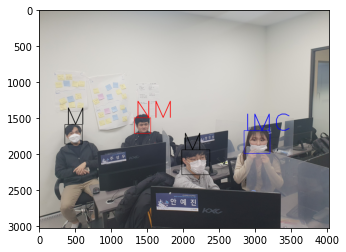

In [262]:
import cv2
img = predict('./8.jpg')

# print(img)
# cv2.imwrite('./test_output.jpg',img)
# plt.imsave('./test_output.jpg',img)